# Visualizing Clusters of Reviews

## Objective

Can we recreate this $5$ basic wine type groupings?

<p align="center">
<img src="images/Different-Types-of-Wine-v2.jpg"alt="wine types" width="300"><img>
</p>

## Load Preprocessed Reviews

Libraries

In [1]:
import pandas as pd
import numpy as np
import time

from IPython.display import Markdown, display

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Source: Kaggle [Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews)

In [2]:
df = pd.read_parquet('files/wine_review.parquet.gzip', columns=['title', 'description', 'preprocessed_description', 'variety', 'country', 'location', 'wine_style', 'type', 'classification'])
df.head()


,title,description,preprocessed_description,variety,country,location,wine_style,type,classification
0,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",aroma include tropical fruit broom brimstone...,White Blend,Italy,Etna,light_white,white,Old World
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",do ripe fruity wine smooth structure firm tann...,Portuguese Red,Portugal,Douro,medium_red,red,Old World
2,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",rainstorm tart snappy flavor lime flesh rind d...,Pinot Gris,US,Oregon,light_white,white,New World
3,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",pineapple rind lemon pith orange blossom start...,Riesling,US,Michigan,aromatic_white,white,New World
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",vintner like regular bottling come rough tanni...,Pinot Noir,US,Oregon,light_red,red,New World


## Vectorize

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer, HashingVectorizer

vectorizer = TfidfVectorizer(max_features=2**12, stop_words="english")
tf_v = vectorizer.fit_transform(df.preprocessed_description)
tf_v.shape

(100538, 4096)

**Inspect Features**

In [4]:
vectorizer.get_feature_names_out()[:50]

array(['10', '16th', '18th', '1970', '19th', '2010', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2025', '2030', 'abbreviate', 'abeja', 'ability',
       'able', 'abound', 'abrasive', 'abrupt', 'abruptly', 'absolute',
       'absolutely', 'absorb', 'abundance', 'abundant', 'abv', 'acacia',
       'accent', 'accentuate', 'acceptable', 'accessible',
       'accompaniment', 'accompany', 'accord', 'account', 'achieve',
       'achievement', 'acid', 'acidic', 'acidity', 'acquire', 'acre'],
      dtype=object)

**Drop Number Features**

In [5]:
features = np.array(list(filter(lambda col: col[:1].isalpha(), vectorizer.get_feature_names_out())))
features[:50]

array(['abbreviate', 'abeja', 'ability', 'able', 'abound', 'abrasive',
       'abrupt', 'abruptly', 'absolute', 'absolutely', 'absorb',
       'abundance', 'abundant', 'abv', 'acacia', 'accent', 'accentuate',
       'acceptable', 'accessible', 'accompaniment', 'accompany', 'accord',
       'account', 'achieve', 'achievement', 'acid', 'acidic', 'acidity',
       'acquire', 'acre', 'acrid', 'act', 'action', 'actually', 'add',
       'addition', 'additional', 'adequate', 'admirable', 'admirably',
       'adorn', 'advanced', 'advantage', 'aeration', 'affect',
       'affordable', 'affordably', 'african', 'afternoon', 'aftertaste'],
      dtype='<U15')

### Feature Matrix

In [6]:
X = pd.DataFrame(tf_v.toarray(), columns=vectorizer.get_feature_names_out())[features]
X

,abbreviate,abeja,ability,able,abound,abrasive,abrupt,abruptly,absolute,absolutely,...,zesty,zin,zinfandel,zing,zingy,zip,zippy,zone,zull,île
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualize

See [Visualizing TF-IDF Scores: A Comprehensive Guide to Plotting a Document TF-IDF 2D Graph](https://www.geeksforgeeks.org/visualizing-tf-idf-scores-a-comprehensive-guide-to-plotting-a-document-tf-idf-2d-graph/) for reference.

**Helper to Visualize Results of Feature Extraction**

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px

# generate image of clusters of reviews based on the features extracted by TF-IDF
def visualize_features(features, df):
  # align the labels and descriptions with the indexes of the samples from feature extraction
  labels = df.iloc[features.index]

  # perform dimensionsal reduction on features extracted by TF-IDF vectorization
  tsne = TSNE(perplexity=10, random_state=42)
  tsne_result = tsne.fit_transform(PCA(5, random_state=42).fit_transform(features.to_numpy()))

  # Create a scatter plot with colors based on variet
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=0.005) #, c='type', cmap='viridis')
  plt.title('Wine t-SNE')
  #plt.colorbar()
  plt.axis("off")
  plt.show()

  color_map = {
    'red': 'rgb(190, 34, 34)',        # Brighter red for claret
    'white': 'rgb(255, 215, 0)',      # Light gold
    'sparkling': 'rgb(0, 128, 128)',  # Teal color for sparkling (lighter shade)
    'rose': 'rgb(255, 105, 180)',     # Brighter pink for rose
    'fortified': 'purple'
  }

  fig = px.scatter(
    tsne_result, x=0, y=1,
    hover_name=labels['title'],
    hover_data={
      'Variety': labels['variety'],
      'Country': labels['country'],
      'Location': labels['location'],
    },
    color=labels['type'],
    color_discrete_map=color_map
  )

  fig.update_traces(
    marker=dict(size=2, opacity=0.75),
    selector=dict(mode='markers'),
    hovertemplate='<b>%{hovertext}</b><br>' +
                  'Variety: %{customdata[0]}<br>' +
                  'Country: %{customdata[1]}<br>' +
                  'Province: %{customdata[2]}'
  )

  fig.update_layout(
      xaxis=dict(showticklabels=False, showgrid=False, title=''),
      yaxis=dict(showticklabels=False, showgrid=False, title=''),
      legend=dict(
        title='',
        font=dict(family='Courier',size=11,),
        orientation='h',  # Set legend orientation to horizontal
        xanchor='center',  # Anchor the legend to the center
        yanchor='bottom',  # Position the legend at the top
        y=0, x=0.48,  # Adjust the position of the legend
        itemsizing='constant',
      ),
      margin=dict(
        l=0,  # Left margin
        r=18,  # Right margin
        t=8,  # Top margin
        b=2,  # Bottom margin
      ),
      plot_bgcolor='rgba(0,0,0,0)',
      width=512,  # Set the width of the figure
      height=512,  # Set the height of the figure
  )

  return fig
  


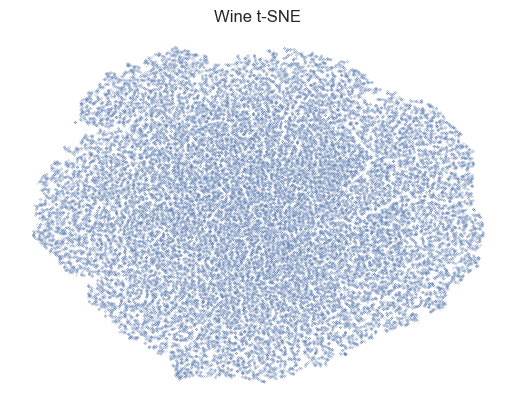

It took 9 minutess to process 100,538 samples with 4,076 features.

In [8]:
start = time.perf_counter()
img = visualize_features(X, df.iloc[X.index])
display(Markdown(f'It took {(time.perf_counter()-start)/60:.0f} minutess to process {X.shape[0]:,d} samples with {X.shape[1]:,d} features.'))


In [ ]:
# save the image to file
img.write_html('images/tsne_plot_review_px_2d.html')
img.write_image('images/tsne_plot_reviews.jpg')

# show the interactive image
img.show()

# note: the output of this cell is deleted before saving and uploading the notebook due to size of the annotated image. 
# A static version of this image without annotation is saved to disk and shown in the next cell.

**Show Image**

(-0.5, 511.5, 511.5, -0.5)

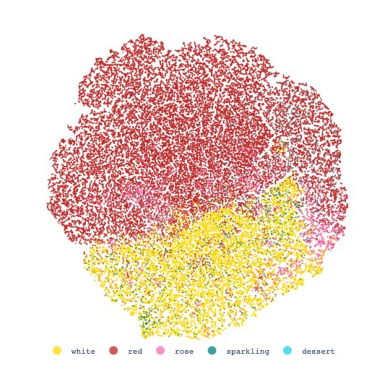

In [14]:

from PIL import Image

img = Image.open('images/tsne_plot_reviews.jpg')
plt.imshow(img)
plt.axis('off')
